<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter13/Image_super_resolution_using_SRGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
if not os.path.exists('srgan.pth.tar'):
    !pip install -q torch_snippets
    !wget -q https://raw.githubusercontent.com/sizhky/a-PyTorch-Tutorial-to-Super-Resolution/master/models.py -O models.py
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    downloaded = drive.CreateFile({'id': '1_PJ1Uimbr0xrPjE8U3Q_bG7XycGgsbVo'})
    downloaded.GetContentFile('srgan.pth.tar')
    from torch_snippets import *
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 36.7MB 81kB/s 
     |████████████████████████████████| 102kB 12.3MB/s 


In [ ]:
model = torch.load('srgan.pth.tar', map_location='cpu')['generator'].to(device)
model.eval()

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.activation.PReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set

Generator(
  (net): SRResNet(
    (conv_block1): ConvolutionalBlock(
      (conv_block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
        (1): PReLU(num_parameters=1)
      )
    )
    (residual_blocks): Sequential(
      (0): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): PReLU(num_parameters=1)
          )
        )
        (conv_block2): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
      )
      (1): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Seque

In [ ]:
!wget https://www.dropbox.com/s/nmzwu68nrl9j0lf/Hema6.JPG

--2020-10-18 07:03:41--  https://www.dropbox.com/s/nmzwu68nrl9j0lf/Hema6.JPG
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nmzwu68nrl9j0lf/Hema6.JPG [following]
--2020-10-18 07:03:42--  https://www.dropbox.com/s/raw/nmzwu68nrl9j0lf/Hema6.JPG
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf5e7114771406b2f7aa5fb2772.dl.dropboxusercontent.com/cd/0/inline/BBejwhTNggmFOJ7aYiOqEpaCw3sj3rdL7-AxT_M727gOkQwnRbLkbUrGjnr-XZAgNflb_omszLDAre8ehKa8Vo-CzBodwQBGrIFrK2NMqE-eK9izcl8d4ZSWAPwuMVJaptU/file# [following]
--2020-10-18 07:03:42--  https://ucf5e7114771406b2f7aa5fb2772.dl.dropboxusercontent.com/cd/0/inline/BBejwhTNggmFOJ7aYiOqEpaCw3sj3rdL7-AxT_M727gOkQwnRbLkbUrGjnr-XZAgNflb_omszLDAre8ehKa8Vo-CzBodwQBGrIFrK2NMqE-eK9izcl8d4ZSW

In [ ]:
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406],
                [0.229, 0.224, 0.225]),
    T.Lambda(lambda x: x.to(device))
])

postprocess = T.Compose([
    T.Lambda(lambda x: (x.cpu().detach()+1)/2),
    T.ToPILImage()
])

In [ ]:
image = readPIL('Hema6.JPG')
image.size
# (260,181)
image = image.resize((130,90))
im = preprocess(image)

In [ ]:
sr = model(im[None])[0]
sr = postprocess(sr)

2020-10-18 07:03:58.160 | INFO     | torch_snippets.loader:subplots:359 - plotting 2 images in a grid of 1x2 @ (10, 10)


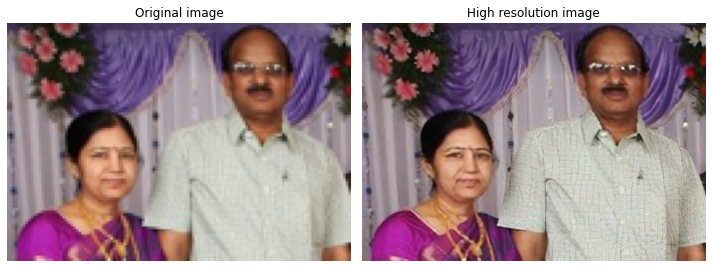

In [ ]:
subplots([image, sr], nc=2, figsize=(10,10), titles=['Original image','High resolution image'])